# ADMAGD - Results

## Importing libraries

In [1]:
import numpy as np
import pandas as pd

## Retrieve Model

In [2]:
model_file_name = "nips_1935_iteration_100"

In [3]:
model_path = f"nips/trained_ model/{model_file_name}"

### Pickle

In [4]:
import pickle

Load the model from a file

In [5]:
with open(f"{model_path}.pkl", 'rb') as f:
    loaded_model = pickle.load(f)

### joblib

In [6]:
# from joblib import load

Load the model from a file

In [7]:
# loaded_model_joblib = load(f"{model_path}.joblib")

## Results

In [8]:
# def print_topic_word_distribution(model):
#     phi = model.calculate_phi_update()  # This gives you the word-topic matrix

#     for topic_idx in range(model.num_topics):
#         print(f"Topic #{topic_idx+1}:\n")
        
#         for word_id in range(model.vocab_size):
#             word_probability = phi[topic_idx, word_id]
#             word = model.id2word[word_id]
#             print(f"{word}: {word_probability:.4f}")
        
#         print("\n\n")  # Print a newline to separate topics

# print_topic_word_distribution(loaded_model)


In [9]:
def print_top_words_per_topic(model, top_n=10):
    phi = model.calculate_phi_update()  # This gives you the word-topic matrix

    for topic_idx in range(model.num_topics):
        print(f"<< Topic # {topic_idx+1} >>")

        # Get the top N word indices for the topic sorted by probability
        top_word_indices = phi[topic_idx].argsort()[-top_n:][::-1]
        
        for word_id in top_word_indices:
            word_probability = phi[topic_idx, word_id]
            word = model.id2word[word_id]
            print(f"{word}: {word_probability:.4f}")

        print("\n")  # Print a newline to separate topics

# After running your model...
print_top_words_per_topic(loaded_model, )


<< Topic # 1 >>
dynamic: 0.0031
temporal: 0.0029
nature: 0.0027
neuroscience: 0.0027
region: 0.0027
brain: 0.0026
fig: 0.0026
signal: 0.0026
trajectory: 0.0026
activity: 0.0025


<< Topic # 2 >>
noise: 0.0033
recover: 0.0031
dimensional: 0.0030
iid: 0.0025
entry: 0.0025
highdimensional: 0.0025
row: 0.0025
noisy: 0.0025
furthermore: 0.0024
signal: 0.0024


<< Topic # 3 >>
classification: 0.0029
produce: 0.0029
discuss: 0.0028
gain: 0.0027
evaluation: 0.0027
bias: 0.0027
easily: 0.0026
final: 0.0026
bad: 0.0025
issue: 0.0025


<< Topic # 4 >>
efficiently: 0.0036
easy: 0.0035
analyze: 0.0032
lemma: 0.0032
acm: 0.0031
transaction: 0.0031
program: 0.0031
outperform: 0.0031
nsf: 0.0030
cluster: 0.0030


<< Topic # 5 >>
recognition: 0.0048
vision: 0.0047
image: 0.0042
cvpr: 0.0042
object: 0.0038
visual: 0.0037
convolutional: 0.0032
pixel: 0.0031
extract: 0.0029
classification: 0.0028


<< Topic # 6 >>
norm: 0.0047
convex: 0.0045
descent: 0.0040
minimization: 0.0035
regularization: 0.0034
oper

### Extract word for each topic

In [10]:
# After you've run Gibbs sampling
word_topic_matrix = loaded_model.word_topic_matrix
word_topic_sum = word_topic_matrix.sum(axis=1)[:, np.newaxis]
word_topic_dist = word_topic_matrix / word_topic_sum

In [18]:
# Visualize the top N words for each topic
N_TOP_WORDS = 50

ALL_TOPIC_WORDS = []
for i in range(loaded_model.num_topics):
    top_words_idx = word_topic_dist[i].argsort()[-N_TOP_WORDS:][::-1]
    top_words = [loaded_model.id2word[idx] for idx in top_words_idx]

    ALL_TOPIC_WORDS.append(top_words)

    # print(f"Topic {i + 1}: {', '.join(top_words)} \n")

In [12]:
word_dic = {}

for topic_words in ALL_TOPIC_WORDS:
  for word in topic_words:
    if word in word_dic:
      word_dic[word] = word_dic[word] + 1
    else:
      word_dic[word] = 1

In [17]:
# word_dic

### Visualize the author-topic distribution

In [14]:
# Normalize the author_topic_matrix to get author-topic distribution

# Compute the sum of rows in author_topic_matrix
author_topic_sum = loaded_model.author_topic_matrix.sum(axis=1)[:, np.newaxis]

# Replace zero sums with a small epsilon value
epsilon = 1e-10
author_topic_sum[author_topic_sum == 0] = epsilon

# Perform element-wise division
author_topic_dist = loaded_model.author_topic_matrix / author_topic_sum

# Visualize the top N topics for each author
N_TOP_TOPICS = 3
top_topics_list = []
for i, author in enumerate(loaded_model.authors):
    top_topics_idx = author_topic_dist[i].argsort()[-N_TOP_TOPICS:][::-1]
    top_topics_list.append(top_topics_idx)
    # print(f"Author {i+1} => {author} : Topic IDs {top_topics_idx} \n")

In [15]:
top_topics_of_authors_df = pd.DataFrame({'authors': loaded_model.authors, 'topics': top_topics_list})
top_topics_of_authors_df.head(10)

,authors,topics
0,Sebastian Stober,"[0, 7, 6]"
1,Daniel J. Cameron,"[9, 8, 7]"
2,Jessica A. Grahn,"[9, 8, 7]"
3,Aurel A. Lazar,"[0, 1, 6]"
4,Yevgeniy Slutskiy,"[9, 8, 7]"
5,Chen-Yu Wei,"[8, 2, 6]"
6,Yi-Te Hong,"[9, 8, 7]"
7,Chi-Jen Lu,"[9, 8, 7]"
8,Katherine A. Heller,"[9, 5, 7]"
9,David B. Dunson,"[1, 9, 5]"


In [16]:
top_topics_of_authors_df[top_topics_of_authors_df['authors'] == 'Hongyuan Zha']


,authors,topics
655,Hongyuan Zha,"[9, 6, 0]"


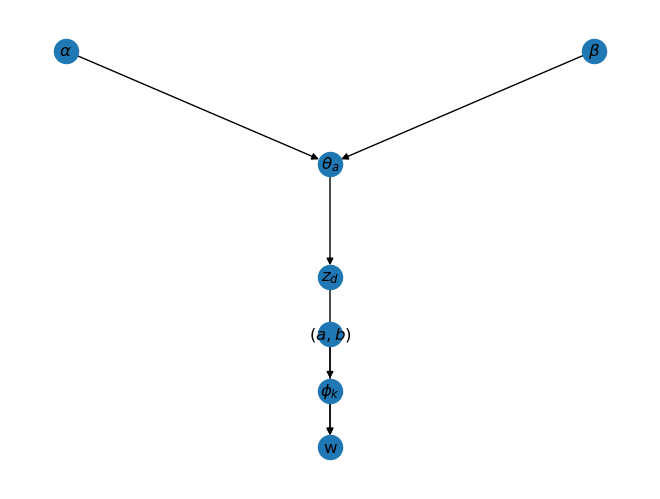

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph():
    G = nx.DiGraph()

    # Adding nodes
    G.add_node("alpha", label=r"$\alpha$")
    G.add_node("beta", label=r"$\beta$")
    G.add_node("theta_a", label=r"$\theta_a$")
    G.add_node("z_d", label=r"$z_d$")
    G.add_node("phi_k", label=r"$\phi_k$")
    G.add_node("w", label="w")
    G.add_node("a_b", label=r"$(a, b)$")

    # Adding edges
    G.add_edge("alpha", "theta_a")
    G.add_edge("beta", "theta_a")
    G.add_edge("theta_a", "z_d")
    G.add_edge("a_b", "phi_k")
    G.add_edge("phi_k", "w")
    G.add_edge("z_d", "w")

    # Positioning nodes
    pos = {
        "alpha": (0.2, 0.8), "beta": (0.8, 0.8),
        "theta_a": (0.5, 0.6),
        "z_d": (0.5, 0.4),
        "phi_k": (0.5, 0.2),
        "w": (0.5, 0.1),
        "a_b": (0.5, 0.3)
    }

    # Drawing
    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'))
    plt.show()

draw_graph()


StopIteration: 

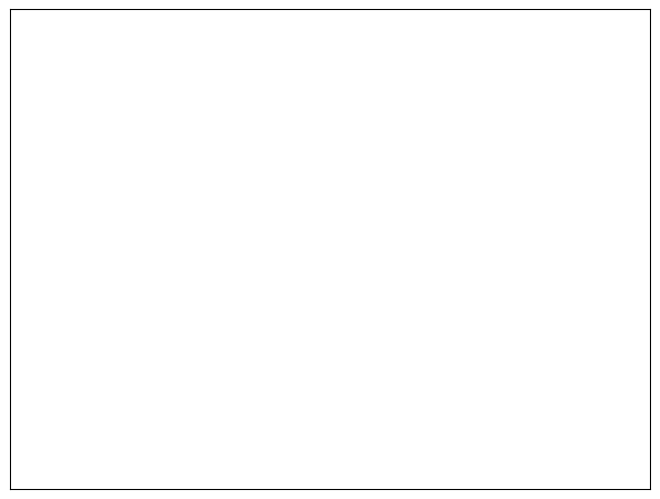

In [7]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

model = BayesianNetwork([('alpha', 'theta_a'), ('beta', 'theta_a'), ('theta_a', 'z_d'), ('a_b', 'phi_k'), ('phi_k', 'w'), ('z_d', 'w')])
nx.draw(model, with_labels=True)
plt.show()


INFO:matplotlib.font_manager:findfont: Found a missing font file.  Rebuilding cache.
INFO:matplotlib.font_manager:generated new fontManager


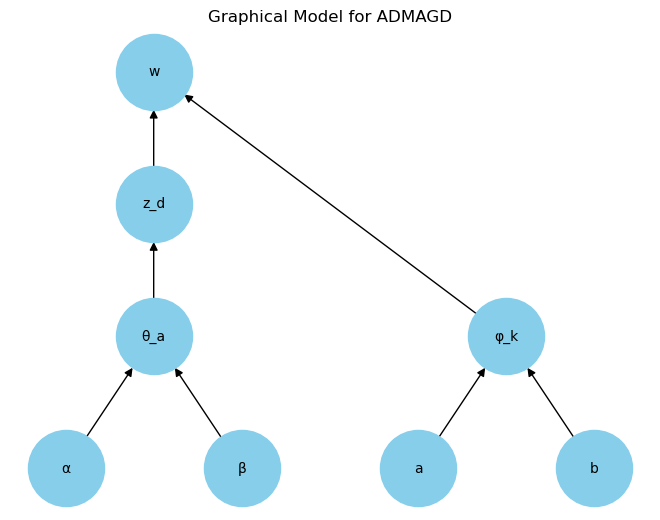

: 

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Adding nodes with their positions for custom layout
nodes = {"α": (1, 4), "β": (2, 4), "a": (3, 4), "b": (4, 4),
         "θ_a": (1.5, 3), "φ_k": (3.5, 3),
         "z_d": (1.5, 2), "w": (1.5, 1)}
edges = [("α", "θ_a"), ("β", "θ_a"), ("a", "φ_k"), ("b", "φ_k"),
         ("θ_a", "z_d"), ("φ_k", "w"), ("z_d", "w")]

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph
pos = {node: (xy[0], -xy[1]) for node, xy in nodes.items()}
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight='bold', arrowstyle='-|>', arrowsize=12)
plt.title('Graphical Model for ADMAGD')
plt.axis('off')  # Turn off the axis
plt.show()
